<a href="https://colab.research.google.com/github/babaroscopy/colab/blob/main/PerceptronMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
# Custom activation function
#from keras.layers import Activation
#from keras.utils.generic_utils import get_custom_objects

In [ ]:
@tf.function
def stepy(x): # user-defined step function, note: not working in sgd bcz of derivative not exist. It needs custom optimizer
    if x > 0.0:
        return 1.0
    else:
        return 0.0

In [ ]:
#Prepare dataset
#dataset=np.random.randint(1,5,[10,3],dtype=np.int32)
#dataset=np.random.rand(10,3)
x_train=np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y_train=np.array([0, 1, 1, 1])
x_test=np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
y_test=np.array([0, 1, 1, 1])

# x_train=np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
# y_train=np.array([0, 1, 1, 0])
# x_test=np.array([[0, 0],[0, 1],[1, 0],[1, 1]])
# y_test=np.array([0, 1, 1, 0])


In [ ]:
#####Delta rule (gradient descent) implementation with a single layer output neuron

In [ ]:
#Model construction (model type, inputs, layers, weight initialization, activation function)
#Layers types(dense, dropout, merge)
#Weight init(uniform(0-0.05), normal(0,0.05), zero)
#Activation (linear(default), relu, sigmoid, tanh, softmax)

model_delta = Sequential()
model_delta.add(Input(shape=(2,)))
model_delta.add(Dense(1, activation='linear', kernel_initializer='random_uniform', bias_initializer='zero'))
#model_delta.add(Dense(1, input_dim=3, activation='linear', kernel_initializer='random_uniform', bias_initializer='zero'))

In [ ]:
#Model compilation (optimizer, loss funciton, metrics(performance))
#optimizer(sgd, RMSprop, Adam), loss(mse,binary_crossentropy,categorical_crossentropy),metrics(accuracy)
model_delta.compile(optimizer='sgd', loss='mse', metrics='accuracy')

In [ ]:
#Model training

model_delta.fit(x_train, y_train, epochs=10, batch_size=1)

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 0.7440 - accuracy: 0.2500
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.2500
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.4771 - accuracy: 0.2500
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.3875 - accuracy: 0.2500
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.3183 - accuracy: 0.2500
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.2649 - accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 0.2234 - accuracy: 0.5000
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.5000
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 0.1665 - accuracy: 0.7500
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1472 - accuracy: 1.0000


In [ ]:
#Model evaluation and prediction
#model.evaluate(),model.predict(),model.predict_classes(),model.predict_proba()

loss, accuracy = model_delta.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

predictions = model_delta.predict(x_test)
rounded = [round(x[0]) for x in predictions]
predictions, rounded

1/1 [==============================] - 0s 213ms/step - loss: 0.1339 - accuracy: 1.0000
Accuracy: 100.00


(array([[0.34060207],
        [0.57359654],
        [0.55904067],
        [0.7920351 ]], dtype=float32), [0, 1, 1, 1])

In [ ]:
#Model summary
#model.summary(),model.get_config(),

model_delta.summary()
model_delta.get_config()
model_delta.get_weights()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


[array([[0.21843857],
        [0.23299447]], dtype=float32), array([0.34060207], dtype=float32)]

In [ ]:
########## MLP Backporpagation
x2_train=np.random.rand(10,3)
y2_train=np.array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1])
x2_test=np.random.rand(5,3)
y2_test=np.array([1, 1, 1, 0, 1]),

model_mlp = Sequential([
        Dense(units=2, input_shape=(3,), activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='random_uniform'),
        Dense(units=1, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='random_uniform')
])
            
opt = keras.optimizers.SGD(learning_rate=0.1)
model_mlp.compile(optimizer=opt, loss='mse', metrics='accuracy')
history = model_mlp.fit(x2_train, y2_train, batch_size=1, epochs=100)
# es = EarlyStopping(monitor='accuracy', mode='max', min_delta=1) #Early stopping criteria (Accuracy 100%)
# history = model_mlp.fit(x2_train, y2_train, batch_size=1, epochs=100, verbose=2, callbacks=[es])

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2534 - accuracy: 0.4000
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2506 - accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2457 - accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.6000
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2447 - accuracy: 0.6000
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2447 - accuracy: 0.6000
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2445 - accuracy: 0.6000
Epoch 11/

dict_keys(['loss', 'accuracy'])


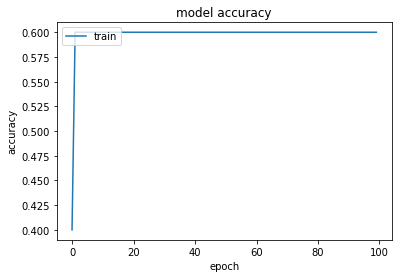

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = model_mlp.evaluate(x2_test, y2_test)
print('Accuracy: %.2f' % (accuracy*100))

predictions = model_mlp.predict(x2_test)
rounded = [round(x[0]) for x in predictions]
predictions, rounded

1/1 [==============================] - 0s 120ms/step - loss: 0.1992 - accuracy: 0.8000
Accuracy: 80.00


(array([[0.60214764],
        [0.6014253 ],
        [0.60218716],
        [0.6017938 ],
        [0.60225546]], dtype=float32), [1, 1, 1, 1, 1])